# 数据探索性分析与数据预处理1-Wine Reviews
数据集：[Wine Reviews](https://www.kaggle.com/zynicide/wine-reviews#winemag-data_first150k.csv)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pandas as pd

## 数据预览

In [2]:
data_filename="D:\Course\DM\wine-reviews\winemag-data_first150k.csv"
dataset_ord=pd.read_csv(data_filename)
dataset_ord.head(3)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley


In [3]:
dataset_ord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   150930 non-null  int64  
 1   country      150925 non-null  object 
 2   description  150930 non-null  object 
 3   designation  105195 non-null  object 
 4   points       150930 non-null  int64  
 5   price        137235 non-null  float64
 6   province     150925 non-null  object 
 7   region_1     125870 non-null  object 
 8   region_2     60953 non-null   object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


In [4]:
l_nominal=['country','designation','province','region_1','region_2','variety']
l_value=['point','price']

###  数据可视化和摘要
- 1 标称数据

In [5]:
def num_freq(name_column,dataset):
    num=dataset[name_column].value_counts()
    num=pd.DataFrame(num)
    return num
def FreqCount(dataset):
    freq_nominal=list()
    for column in l_nominal:
        print(str(column)+ '可能的取值的频数：')
        freq_nominal.append(num_freq(column,dataset))
        print(freq_nominal[-1])
    return freq_nominal;
dt=dataset_ord
freq_nom=FreqCount(dt)

country可能的取值的频数：
                        country
US                        62397
Italy                     23478
France                    21098
Spain                      8268
Chile                      5816
Argentina                  5631
Portugal                   5322
Australia                  4957
New Zealand                3320
Austria                    3057
Germany                    2452
South Africa               2258
Greece                      884
Israel                      630
Hungary                     231
Canada                      196
Romania                     139
Slovenia                     94
Uruguay                      92
Croatia                      89
Bulgaria                     77
Moldova                      71
Mexico                       63
Turkey                       52
Georgia                      43
Lebanon                      37
Cyprus                       31
Brazil                       25
Macedonia                    16
Serbia                 

使用直方图对标称数据进行可视化描述。
（为数据更好的可视化效果，暂时去除频度过于小的取值）

In [6]:
def MergeSmall(freq_nominal):
    for dataframe in freq_nominal:
        count=0
        num=0
        drop_list=list()
        print('属性：'+dataframe.columns[0])
        for i in range(0,len(dataframe)):
            if(dataframe.values[i][0]<dataframe.shape[0]*0.01 or dataframe.values[i][0]<1000): #忽略小于1%的
                num+=1
                count+=dataframe.values[i][0]
                drop_list.append(i)
    
        drop_list=sorted(drop_list, reverse=True)
        for value in drop_list: 
            dataframe.drop(dataframe.index[value],inplace=True)
        print(dataframe)
        print('others( '+str(num)+')：       '+str(count))
    return freq_nominal
def MergeSmallWithoutPrint(freq_nominal):
    for dataframe in freq_nominal:
        drop_list=list()
        for i in range(0,len(dataframe)):
            if(dataframe.values[i][0]<dataframe.shape[0]*0.01 or dataframe.values[i][0]<1000): #忽略小于1%的
                drop_list.append(i)   
        drop_list=sorted(drop_list, reverse=True)
        for value in drop_list: 
            dataframe.drop(dataframe.index[value],inplace=True)
    return freq_nominal

freq_nom=MergeSmallWithoutPrint(freq_nom)


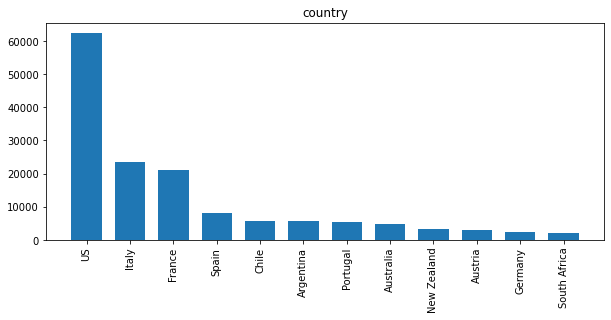

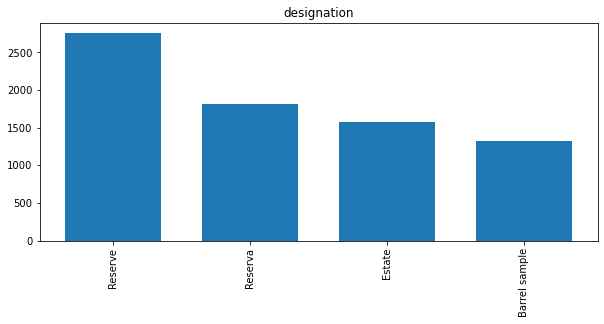

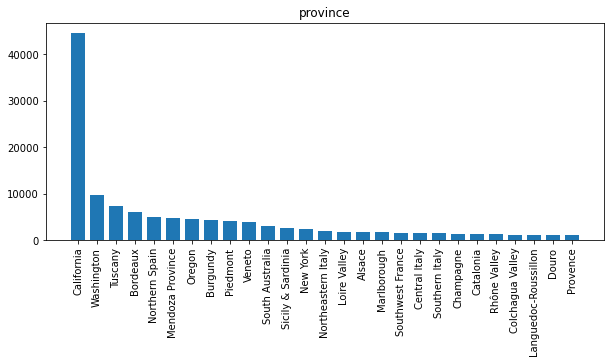

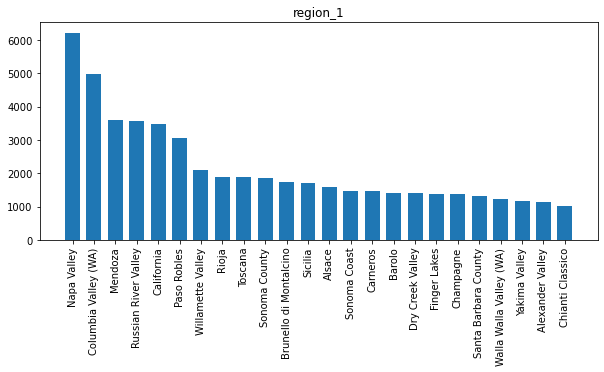

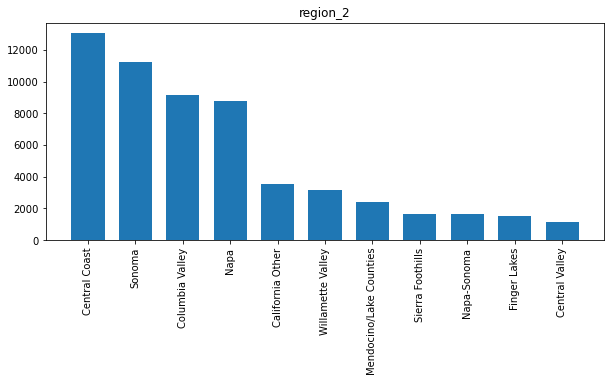

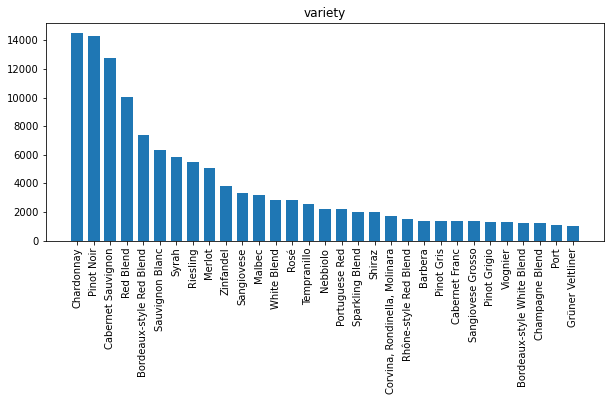

In [7]:
def ShowHist(data_frame):
    plt.figure(figsize=(10,4))
    l_unique_data=list(data_frame.index)
    l_num=list()
    for i in data_frame.values:
        l_num.append(i[0])
    plt.bar(l_unique_data, l_num, width=0.7)
    plt.xticks(l_unique_data,rotation=90)
    plt.title(data_frame.columns[0])
    plt.show()
for data_frame in freq_nom:
    ShowHist(data_frame)

- 2 数值属性
    五数描述

In [8]:
dt=dataset_ord
df_num=pd.DataFrame(dt.describe())
df_num.drop(['count','mean','std'],inplace=True)
df_num.drop(['Unnamed: 0'],axis=1,inplace=True)
print(df_num)
null_value=dt.isnull().sum()
print('point 缺失值个数')
print(null_value['points'])
print('price 缺失值个数')
print(null_value['price'])

     points   price
min    80.0     4.0
25%    86.0    16.0
50%    88.0    24.0
75%    90.0    40.0
max   100.0  2300.0
point 缺失值个数
0
price 缺失值个数
13695


使用盒图和直方图对points进行可视化

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016F51E98408>]],
      dtype=object)

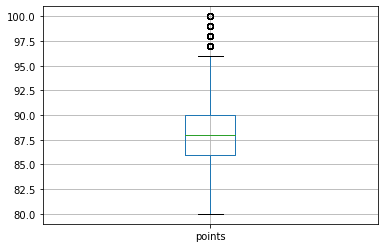

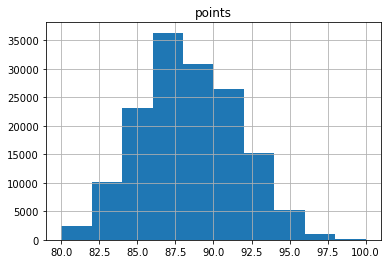

In [9]:
dt.boxplot('points')
dt.hist(column='points')

使用盒图和直方图对price进行可视化

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016F561C03C8>]],
      dtype=object)

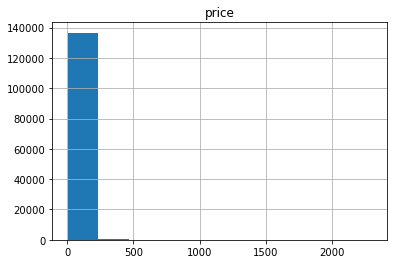

In [10]:
dt.hist(column='price')

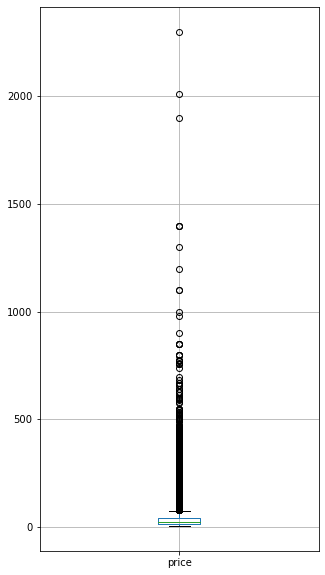

In [11]:
dt.boxplot('price',figsize=(5,10))

##### price 属性离群点较多，去除price>150的离群点，重新绘制盒图

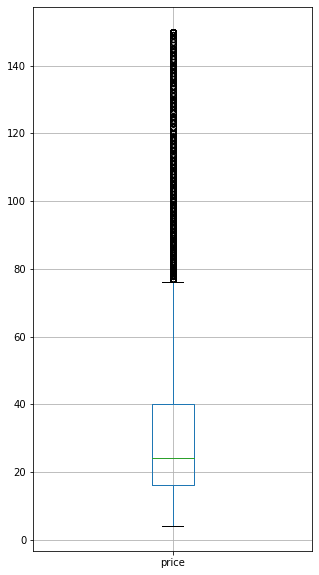

In [12]:
dt=dt.drop(dt[dt.price >150].index)
dt.boxplot('price',figsize=(5,10))

##  数据缺失的处理
观察数据集中缺失数据，分析其缺失的原因。分别使用下列四种策略对缺失值进行处理:

- 将缺失部分剔除
- 用最高频率值来填补缺失值
- 通过属性的相关关系来填补缺失值
- 通过数据对象之间的相似性来填补缺失值

### 将缺失部分剔除

In [13]:
dt1=dataset_ord.dropna(axis=0,subset=['price'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016F58EC1748>]],
      dtype=object)

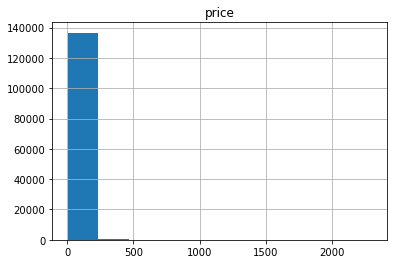

In [14]:
dt1.hist(column='price')

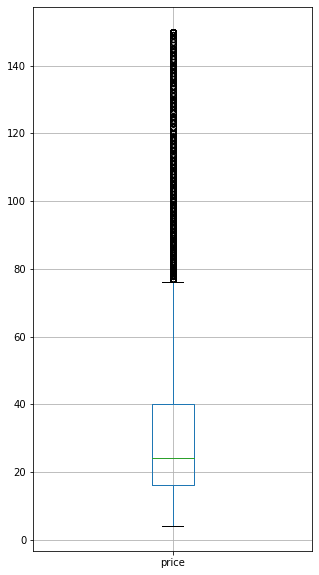

In [15]:
dt1=dt1.drop(dt1[dt1.price >150].index)
dt1.boxplot('price',figsize=(5,10))

### 用最高频率值来填补缺失值

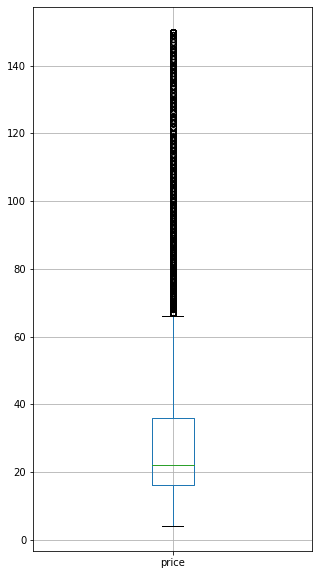

In [16]:
dt2=dataset_ord
df1=pd.DataFrame(dt2)
df1=pd.DataFrame(df1.mode())
dt2['price']=dt2['price'].fillna(df1['price'][0])
dt2=dt2.drop(dt2[dt2.price >150].index)
dt2.boxplot('price',figsize=(5,10))

### 通过属性的相关关系来填补缺失值

属性region_2是更加具体的区域描述，因此，对于region_2的空缺可以通过region_1的属性关系进行填充

In [17]:
dt3=dataset_ord
dt3=dt3[['region_1','region_2']].fillna(method='ffill',axis=1)

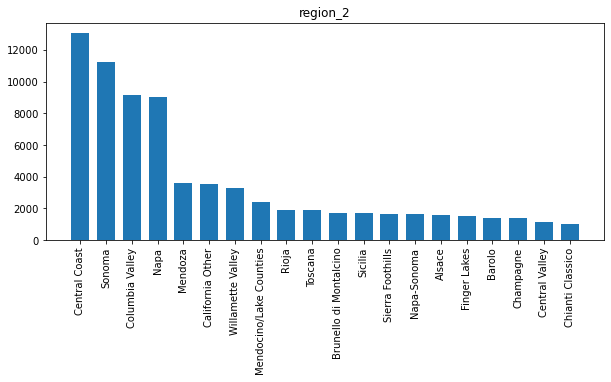

In [18]:
num=dt3['region_2'].value_counts()
dt3=pd.DataFrame(num)
freq=[dt3]
MergeSmallWithoutPrint(freq)
ShowHist(dt3)

### 通过数据对象之间的相似性来填补缺失值


评分相似的葡萄酒价格相似，按point进行排序，使得price空缺值等于临近非空行记录的price值

In [19]:
dt4=dataset_ord.sort_values(by="points",ascending=False)

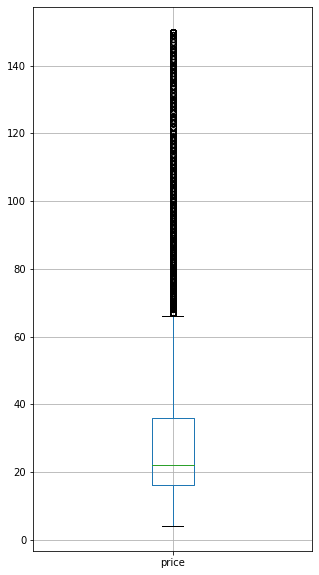

In [20]:
dt4=dt4.fillna(axis=0,method='ffill')
dt4=dt4.drop(dt4[dt4.price >150].index)
dt4.boxplot('price',figsize=(5,10))